In [11]:
import numpy as np
from sklearn import datasets

import matplotlib.pyplot as plt

# Datasets
iris = datasets.load_iris()

# On peut s'interroger sur la structure de notre jeu de données pour avoir une idée de comment on va les exploter
# dans notre ananlyse
print(iris.keys())
print(iris.data[:5])
print(np.unique( iris.target ) )
print(iris.target_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 1 2]
['setosa' 'versicolor' 'virginica']


In [12]:
# 2. Comptez le nombre de fleures par catégorie.
for i, name in enumerate(iris.target_names):
    print(name, (iris.target == i).sum() )

setosa 50
versicolor 50
virginica 50


In [13]:
# 3. Calculez la moyenne des longueurs des pétales, sépales de toutes les fleures, puis par catégorie de fleure.
# Moyenne générale des longueurs de sépale
print("moyenne générale des longueurs des sépales",np.around(np.mean( iris.data[:,0])))
# Moyenne générale des longueurs de pétale
print("moyenne générale des longueurs des pétales", np.around(np.mean( iris.data[:,2])))

# sépale moyenne des longueurs pour la catégorie setosa
print( "sepale moyenne longueur setosa" ,np.around( np.mean( iris.data[iris.target == 0][:, 0] ), 2 ) )
print( "sepale moyenne longueur versicolor" ,np.around( np.mean( iris.data[iris.target == 1][:, 0] ), 2 ) )
print( "sepale moyenne longueur virginica" ,np.around( np.mean( iris.data[iris.target == 2][:, 0] ), 2 ) )

# pétale moyenne des longueurs par cat
print("petale moyenne longueur setosa" , np.around( np.mean( iris.data[iris.target == 0][:, 2] ), 2 ) )
print( "petale moyenne longueur versicolor" ,np.around( np.mean( iris.data[iris.target == 1][:, 2] ), 2 ) )
print( "petale moyenne longueur virginica" ,np.around( np.mean( iris.data[iris.target == 2][:, 2] ), 2 ) )

moyenne générale des longueurs des sépales 6.0
moyenne générale des longueurs des pétales 4.0
sepale moyenne longueur setosa 5.01
sepale moyenne longueur versicolor 5.94
sepale moyenne longueur virginica 6.59
petale moyenne longueur setosa 1.46
petale moyenne longueur versicolor 4.26
petale moyenne longueur virginica 5.55


In [14]:
# 4 Max de la longueur 
mask_length_petale = iris.data[:, 2] == np.max( iris.data[:, 2] )
print("mask_length_petale",iris.data[mask_length_petale])

mask_surface_petale = iris.data[:, 2] * iris.data[:, 3] == np.max(iris.data[:, 2] * iris.data[:, 3])
print("mask_surface_petale",iris.data[mask_surface_petale])

mask_length_petale [[7.7 2.6 6.9 2.3]]
mask_surface_petale [[7.7 2.6 6.9 2.3]]


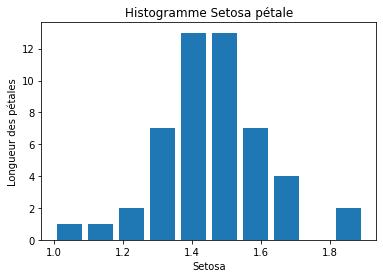

In [15]:
# 5, 6
fig = plt.figure()
# setosa
plt.hist(iris.data[iris.target == 0][:, 2], rwidth=0.8)

plt.ylabel('Longueur des pétales')
plt.xlabel('Setosa')
plt.title('Histogramme Setosa pétale');

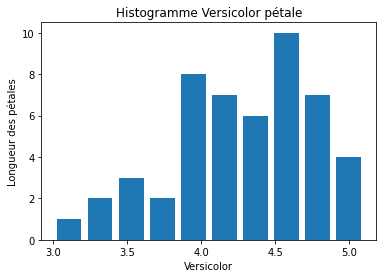

In [16]:
fig = plt.figure()
# versicolor
plt.hist(iris.data[iris.target == 1][:, 2], rwidth=0.8)

plt.ylabel('Longueur des pétales')
plt.xlabel('Versicolor')
plt.title('Histogramme Versicolor pétale');

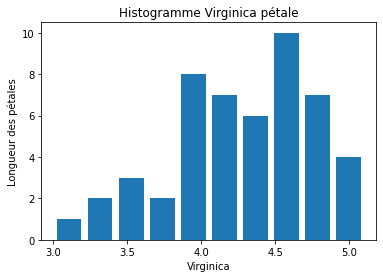

In [17]:
fig = plt.figure()
# virginica
plt.hist(iris.data[iris.target == 1][:, 2], rwidth=0.8)
plt.ylabel('Longueur des pétales')
plt.xlabel('Virginica')
plt.title('Histogramme Virginica pétale');

In [18]:
import random as r
# 1. Bernouilli
def bernouilli(p = .5):
    
    if r.random() > p:
        return 0
    
    return 1

print(bernouilli())

1


In [19]:
# 2 
def experience(n, p = .5, target = 1):
    count = 0
    for _ in range(n):
        if bernouilli(p) == target:
            count += 1
    return count
data = [ experience(10) for _ in range(1_000_000) ]

In [20]:
# 3
count = 0
NB_SEARCH = 3
for _ in range(1_000_000):
    if experience(10) == NB_SEARCH:
        count += 1

In [21]:
# Calcul empirique 
print(count/1_000_000)
# théorique avec numpy
((np.random.binomial(10, 0.5, 1_000_000) == NB_SEARCH).sum())/1_000_000

0.117191


0.117325